In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv


In [4]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the data
train = pd.read_csv("../input/digit-recognizer/train.csv")
test = pd.read_csv("../input/digit-recognizer/test.csv")

In [6]:
train.tail()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#converting the data into array
training = np.array(train, dtype = 'float32')
testing = np.array(test, dtype = 'float32')

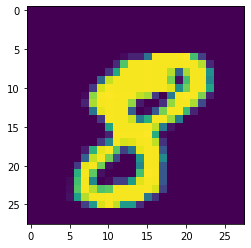

In [8]:
plt.imshow(training[10, 1:].reshape(28, 28))

In [9]:
x_train = training[:, 1:]/255
y_train = training[:, 0]

In [10]:
x_test = testing/255

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.1, random_state = 0)

In [12]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
x_validate = x_validate.reshape(x_validate.shape[0],28,28,1)

In [13]:
x_train.shape

(37800, 28, 28, 1)

In [14]:
x_test.shape

(28000, 28, 28, 1)

In [15]:
x_validate.shape

(4200, 28, 28, 1)

In [16]:
import keras

Using TensorFlow backend.


In [17]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard


In [18]:
model = Sequential()

In [19]:
model.add(Conv2D(64, 3, 3, input_shape = (28, 28, 1), activation ='relu'))
model.add(Conv2D(64, 3, 3, activation ='relu'))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  


In [20]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [21]:
model.add(Flatten())

In [22]:
model.add(Dense(output_dim = 32, activation ='relu'))
model.add(Dense(output_dim = 10, activation ='softmax'))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  


In [23]:
model.add(Dropout(0.25))

In [24]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(lr = 0.001), metrics =['accuracy'])

In [25]:
epochs = 50

In [ ]:
model.fit(x_train,
         y_train,
         batch_size = 512,
         epochs = epochs,
         verbose = 1,
         validation_data = (x_validate, y_validate))

In [ ]:
x_pred = model.predict(x_test)

In [ ]:
x_pred = np.argmax(x_pred,axis = 1)
x_pred = pd.Series(x_pred,name="Label")

In [ ]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),x_pred],axis = 1)

In [ ]:
submission.to_csv("cnn_mnist_datagen.csv",index=False)